# Boston AirBnB Data Visualisation

## 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## 2. Data Understanding

### 2.1. Listings

In [2]:
#load data
listings = pd.read_csv('C:/Users/annak/GITHUB/Boston_AirBnB_DataAnalysis/data/listings.csv')
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [3]:
#data description
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [4]:
#shape
listings.shape

(3585, 95)

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [6]:
#see columns with more than 60% missing
listings_null = listings.columns[listings.isna().mean() > 0.6]
listings_null

Index(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [7]:
#percentage of missing values
for col in listings_null:
    print("{} {:.2f}".format(col, listings[col].isna().mean()))

neighbourhood_group_cleansed 1.00
square_feet 0.98
weekly_price 0.75
monthly_price 0.75
security_deposit 0.63
has_availability 1.00
license 1.00
jurisdiction_names 1.00


In [8]:
listings_dropped = listings.drop(columns=listings_null)
listings_dropped.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,9.0,10.0,f,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,10.0,10.0,f,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,9.0,10.0,f,f,flexible,f,f,1,2.25


**Remarks:**

**When having a lot of missing values within a feature, we can think of dropping it when not important. 
Neighbourhood_group_cleansed, has_availability, license and jurisdiction_names have no values given so we can drop them.**

**Prices are handled in calendar dataset so weekly_price and monthly_price can be skipped.**

**Square_feet and security_deposit seem important. Unfortunately, in 98% cases square footage is missing so we can drop this column. In 63% cases deposit information is missing and we cannot guess if this is because deposit is not needed or just not given, so let's drop it as well.**

### 2.2 Calendar

In [9]:
#load data
calendar = pd.read_csv('C:/Users/annak/GITHUB/Boston_AirBnB_DataAnalysis/data/calendar.csv')
calendar.sample(5)

,listing_id,date,available,price
746326,8799256,2017-05-25,f,NaN
769268,14574734,2017-07-08,f,NaN
108449,1628130,2017-06-25,f,NaN
145633,1187188,2016-09-07,t,$200.00
93122,13623390,2017-07-20,t,$100.00


In [10]:
#unique values in available column
calendar['available'].unique()

array(['f', 't'], dtype=object)

In [11]:
#available has only one type when null values are dropped
calendar.dropna()['available'].unique()

array(['t'], dtype=object)

In [12]:
#describe data
calendar.describe()

,listing_id
count,1.308890e+06
mean,8.442118e+06
std,4.500149e+06
min,3.353000e+03
25%,4.679319e+06
50%,8.578710e+06
75%,1.279603e+07
max,1.493346e+07


In [13]:
#shape
calendar.shape

(1308890, 4)

In [14]:
#missing values per feature
calendar.isna().mean()

listing_id    0.000000
date          0.000000
available     0.000000
price         0.508716
dtype: float64

In [15]:
#data types
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [16]:
#unique values
calendar.nunique()

listing_id    3585
date           365
available        2
price         1246
dtype: int64

**Remarks: Data types in calendar listings are specified as objects (strings). That is why describe method does not show meaningful information. In order to have price listed, flat should be available.**

## 3. Data Preparation

In [17]:
# remove sign
def remove_sign(x, sign):
    if type(x) is str:
        x = float(x.replace(sign, '').replace(',', ''))
    return x

In [18]:
#remove '$' sign from price
calendar['price'] = calendar['price'].apply(remove_sign, sign='$')
listings_dropped['price'] = listings_dropped['price'].apply(remove_sign, sign='$')

In [19]:
#str to datetime
to_datetime = lambda x: datetime.datetime.strptime(str(x),'%Y-%m-%d')
calendar['date'] = calendar['date'].apply(to_datetime)

In [20]:
#replace t with 1 and f with 0
calendar['available']=calendar.available.replace({'t':1, 'f':0})

In [21]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null datetime64[ns]
available     1308890 non-null int64
price         643037 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 39.9 MB


## 4. Modeling

### 4.1 Is there any connection between house availability and price?

In [22]:
# total number of available home each day
avaliable_houses = calendar.groupby('date').apply(lambda x: x.notnull().sum())[['price']]
# change column name
avaliable_houses = avaliable_houses.rename( {"price": "available_houses"}, axis = 'columns' )

In [23]:
# everyday average prices
calendar_notnull = calendar[ calendar['price'].notnull() ]
# average house price for boston everyday
average_price = calendar_notnull.groupby('date').mean()[['price']]
# change column name
average_price = average_price.rename( {"price": "average_prices"}, axis = 'columns' )

C:\Users\annak\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


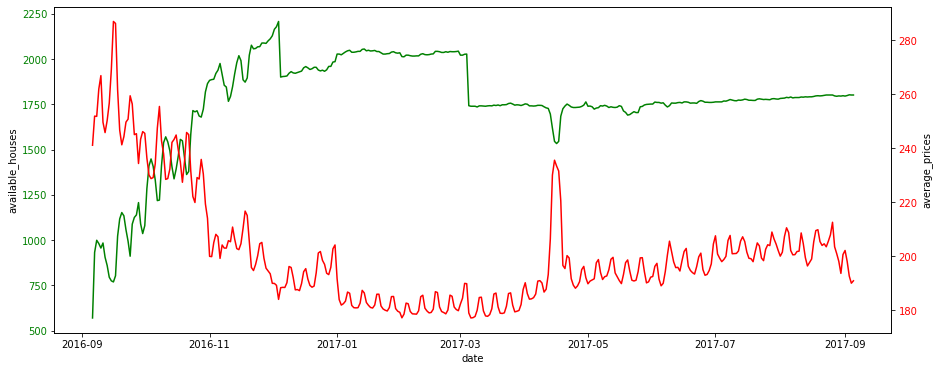

In [24]:
# plot total available houses and average prices in one figure
f, ax = plt.subplots(figsize=(15, 6))
plt1 = sns.lineplot(x = avaliable_houses.index, y = 'available_houses',
                    data = avaliable_houses, color = "g", legend = False)
for y1 in ax.get_yticklabels():
    y1.set_color('g')

ax2 = ax.twinx()
plt2 = sns.lineplot(x = average_price.index, y = 'average_prices',
                    data=average_price, ax = ax2, color = "r", legend = False)
for y2 in ax2.get_yticklabels():
    y2.set_color('r')

**Remarks**

Availability of houses:

- changes over the time period presented
- was increasing till the end of 2016, then it was rather stable apart from 3 episodes (Dec'16, Mar'17, Apr'17)

Average prices:

- prices drop as home supply increase till the end of 2016
- there are small increases and decreases in prices over the whole period which suggest that on the peaks we have weekends
- there is one sudden substantial increase and drop in Apr'17 

Houses availability vs. average prices:
- sudden drop of houses availability in Mar'17 does not influence price
- sudden drop of houses availability in Apr'17 causes price to go up

## 4.2 What influences house prices?

In [25]:
listings_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 87 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [26]:
# keep listings with not null prices
listing_price = listings_dropped[listings_dropped['price'].notnull()]

In [27]:
listing_price['price'].head(2)

0    250.0
1     65.0
Name: price, dtype: float64

In [28]:
listing_price.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
      

In [29]:
def plot_price_by_cat(colname, listings = listings, fig_row_size = 11, fig_col_size = 9):
    price_col = listing_price.groupby(colname).mean()[['price']]
    price_col.reset_index(inplace = True)
    f, ax = plt.subplots(figsize = (fig_row_size, fig_col_size))
    sns.barplot(y = colname, x = 'price', data = price_col.sort_values(by = 'price', ascending = False))

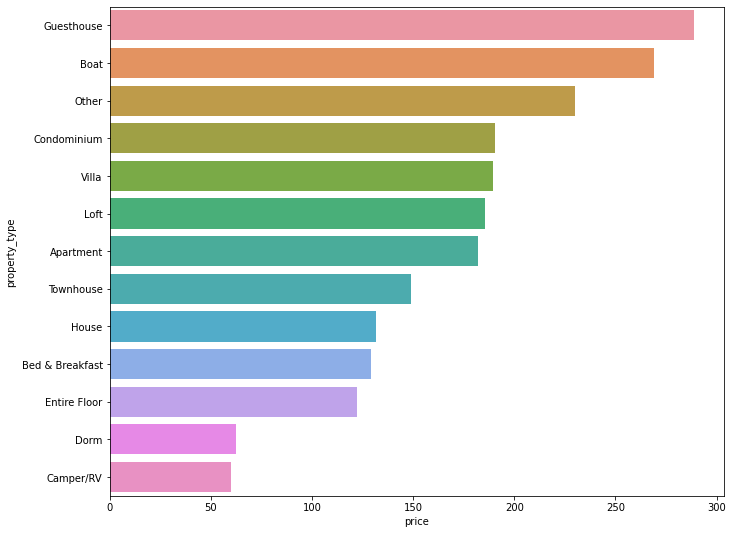

In [30]:
#price and property type
plot_price_by_cat('property_type', listings = listing_price)

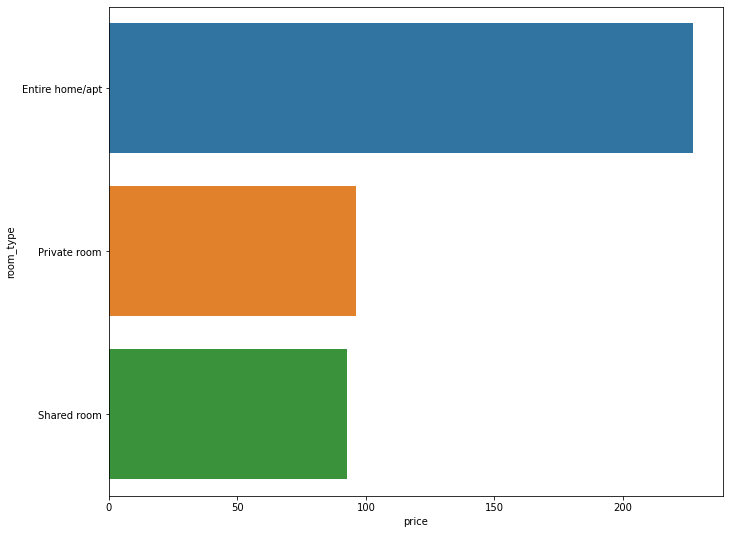

In [31]:
#price and room type
plot_price_by_cat('room_type', listings = listing_price)

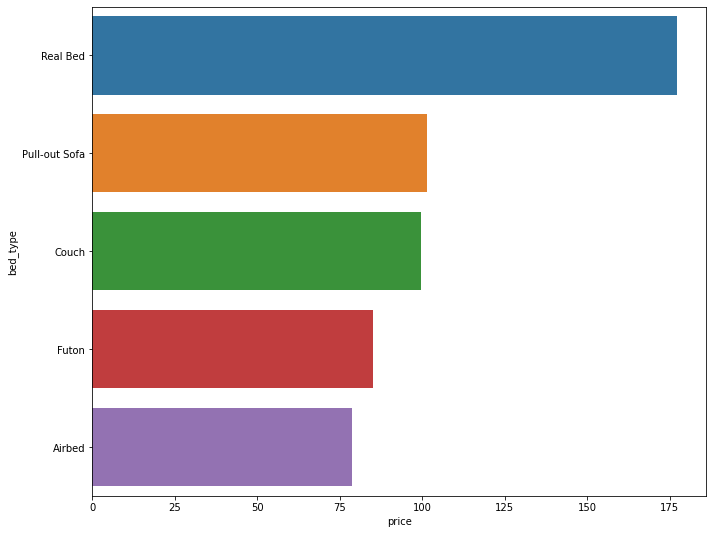

In [32]:
#price and bed type
plot_price_by_cat('bed_type', listings = listing_price)

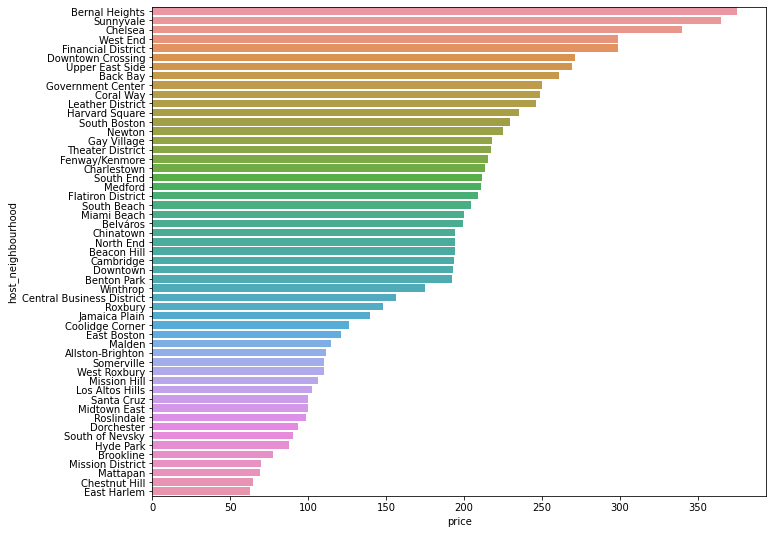

In [33]:
#price and neighborhood
plot_price_by_cat('host_neighbourhood', listings = listing_price)

## 4.3 How to increase house price??

In [34]:
#take susbet of columns
listings_small=listings[['price','summary', 'interaction', 'notes', 'access',
                         'host_response_rate', 'longitude', 'latitude', 'room_type',
                         'accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews']]
listings_small.head()

,price,summary,interaction,notes,access,host_response_rate,longitude,latitude,room_type,accommodates,bathrooms,bedrooms,beds,number_of_reviews
0,$250.00,"Cozy, sunny, family home. Master bedroom high...",NaN,NaN,"You will have access to 2 bedrooms, a living r...",NaN,-71.133068,42.282619,Entire home/apt,4,1.5,2.0,3.0,0
1,$65.00,Charming and quiet room in a second floor 1910...,"If I am at home, I am likely working in my hom...","If you don't have a US cell phone, you can tex...",Apt has one more bedroom (which I use) and lar...,100%,-71.134374,42.286241,Private room,2,1.0,1.0,1.0,36
2,$65.00,"Come stay with a friendly, middle-aged guy in ...","ABOUT ME: I'm a laid-back, friendly, unmarried...",I am in a scenic part of Boston with a couple ...,"I am living in the apartment during your stay,...",100%,-71.135765,42.292438,Private room,2,1.0,1.0,1.0,41
3,$75.00,Come experience the comforts of home away from...,We do live in the house therefore might be som...,Please be mindful of the property as it is old...,The basement has a washer dryer and gym area. ...,100%,-71.121021,42.281106,Private room,4,1.0,1.0,2.0,1
4,$79.00,"My comfy, clean and relaxing home is one block...",I love my city and really enjoy sharing it wit...,I have one roommate who lives on the lower lev...,You will have access to the front and side por...,100%,-71.136258,42.284512,Private room,2,1.5,1.0,2.0,29


In [35]:
#dataframe that will include encoded dummy variables
listings_dum= listings_small.copy()

#get dummies and concatenate
listings_dum= pd.concat([listings_dum, pd.get_dummies(listings_small.bathrooms,
                                                      prefix='bathrooms',
                                                      dummy_na=True)], axis=1)

listings_dum= pd.concat([listings_dum, pd.get_dummies(listings_small.bedrooms,
                                                      prefix='bedrooms',
                                                      dummy_na=True)], axis=1)

listings_dum= pd.concat([listings_dum, pd.get_dummies(listings_small.room_type,
                                                      prefix='room_type',
                                                      dummy_na=True)], axis=1)


listings_dum= pd.concat([listings_dum, pd.get_dummies(listings_small.beds,
                                                      prefix='beds',
                                                      dummy_na=True)], axis=1)

listings_dum= listings_dum.drop(columns=['bathrooms',
                                         'bedrooms', 'room_type', 'beds'])

listings_dum.head()

,price,summary,interaction,notes,access,host_response_rate,longitude,latitude,accommodates,number_of_reviews,...,beds_2.0,beds_3.0,beds_4.0,beds_5.0,beds_6.0,beds_7.0,beds_8.0,beds_9.0,beds_16.0,beds_nan
0,$250.00,"Cozy, sunny, family home. Master bedroom high...",NaN,NaN,"You will have access to 2 bedrooms, a living r...",NaN,-71.133068,42.282619,4,0,...,0,1,0,0,0,0,0,0,0,0
1,$65.00,Charming and quiet room in a second floor 1910...,"If I am at home, I am likely working in my hom...","If you don't have a US cell phone, you can tex...",Apt has one more bedroom (which I use) and lar...,100%,-71.134374,42.286241,2,36,...,0,0,0,0,0,0,0,0,0,0
2,$65.00,"Come stay with a friendly, middle-aged guy in ...","ABOUT ME: I'm a laid-back, friendly, unmarried...",I am in a scenic part of Boston with a couple ...,"I am living in the apartment during your stay,...",100%,-71.135765,42.292438,2,41,...,0,0,0,0,0,0,0,0,0,0
3,$75.00,Come experience the comforts of home away from...,We do live in the house therefore might be som...,Please be mindful of the property as it is old...,The basement has a washer dryer and gym area. ...,100%,-71.121021,42.281106,4,1,...,1,0,0,0,0,0,0,0,0,0
4,$79.00,"My comfy, clean and relaxing home is one block...",I love my city and really enjoy sharing it wit...,I have one roommate who lives on the lower lev...,You will have access to the front and side por...,100%,-71.136258,42.284512,2,29,...,1,0,0,0,0,0,0,0,0,0


In [36]:
listings_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 46 columns):
price                        3585 non-null object
summary                      3442 non-null object
interaction                  2031 non-null object
notes                        1610 non-null object
access                       2096 non-null object
host_response_rate           3114 non-null object
longitude                    3585 non-null float64
latitude                     3585 non-null float64
accommodates                 3585 non-null int64
number_of_reviews            3585 non-null int64
bathrooms_0.0                3585 non-null uint8
bathrooms_0.5                3585 non-null uint8
bathrooms_1.0                3585 non-null uint8
bathrooms_1.5                3585 non-null uint8
bathrooms_2.0                3585 non-null uint8
bathrooms_2.5                3585 non-null uint8
bathrooms_3.0                3585 non-null uint8
bathrooms_3.5                3585 non-null uint8
b

In [37]:
listings_dum[listings_dum.summary.isnull() == True]

,price,summary,interaction,notes,access,host_response_rate,longitude,latitude,accommodates,number_of_reviews,...,beds_2.0,beds_3.0,beds_4.0,beds_5.0,beds_6.0,beds_7.0,beds_8.0,beds_9.0,beds_16.0,beds_nan
25,$95.00,NaN,NaN,NaN,NaN,100%,-71.130238,42.290904,2,40,...,0,0,0,0,0,0,0,0,0,0
26,$90.00,NaN,I try to leave guests alone unless they need h...,NaN,Guests have use of bedroom shared bathroom and...,100%,-71.131858,42.291520,2,43,...,0,0,0,0,0,0,0,0,0,0
28,$100.00,NaN,"I like to meet with guests, hear their stories...","I was once a great traveller, though I seem to...",You are free to use the kitchen and cook as yo...,60%,-71.134497,42.292238,2,11,...,1,0,0,0,0,0,0,0,0,0
56,$140.00,NaN,NaN,NaN,NaN,50%,-71.103387,42.313792,4,1,...,0,0,0,0,0,0,0,0,0,0
57,$70.00,NaN,NaN,NaN,NaN,100%,-71.116221,42.307975,2,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,$79.00,NaN,NaN,NaN,NaN,100%,-71.066521,42.293626,3,118,...,0,0,0,0,0,0,0,0,0,0
3020,$58.00,NaN,NaN,NaN,Guests have access to a private bedroom and sh...,83%,-71.049664,42.308053,1,1,...,0,0,0,0,0,0,0,0,0,0
3218,$99.00,NaN,NaN,If you are traveling with children please cons...,NaN,100%,-71.054853,42.332613,4,92,...,1,0,0,0,0,0,0,0,0,0
3234,$200.00,NaN,NaN,Should you need parking …. PLEASE ASK ABOUT IT...,NaN,100%,-71.039842,42.330664,6,132,...,0,1,0,0,0,0,0,0,0,0


In [38]:
listings_dum.shape

(3585, 46)

In [39]:
listings_dum = listings_dum.dropna(subset=['summary'])

In [40]:
listings_dum.shape

(3442, 46)

In [41]:
#instantiate analyzer for sentiment
analyser = SentimentIntensityAnalyzer()

#define new features
length=[]
back_bay=[]
south_end= []
traveler= []
pos=[]
neutral= []
neg= []
compound= []

#loop over words in dataframe
for word in listings_dum['summary']:
    
    #append length
    length.append(len(word))
    
    #1 if mentioned and 0 if omitted
    if 'back bay' in word:
        back_bay.append(1)
    else:
        back_bay.append(0)
    
    if 'south end' in word:
        south_end.append(1)
    else:
        south_end.append(0)
        
    if any(substring in word for substring in ['traveler', 'travelers', 'adventuter', 'adventuters']):
        traveler.append(1)
    else:
        traveler.append(0)
    
    #get the feels
    score= analyser.polarity_scores(word)
    
    #append feels
    pos.append(score['pos'])
    neutral.append(score['neu'])
    neg.append(score['neg'])
    compound.append(score['compound'])

In [42]:
#define new dataframe
df_sentiment= listings_dum.copy()

#add new columns
df_sentiment['length']= length
df_sentiment['back_bay']= back_bay
df_sentiment['south_end']= south_end
df_sentiment['traveler']= traveler
df_sentiment['pos']= pos
df_sentiment['neutral']= neutral
df_sentiment['neg']= neg
df_sentiment['compound']= compound

df_sentiment.head()

,price,summary,interaction,notes,access,host_response_rate,longitude,latitude,accommodates,number_of_reviews,...,beds_16.0,beds_nan,length,back_bay,south_end,traveler,pos,neutral,neg,compound
0,$250.00,"Cozy, sunny, family home. Master bedroom high...",NaN,NaN,"You will have access to 2 bedrooms, a living r...",NaN,-71.133068,42.282619,4,0,...,0,0,249,0,0,0,0.350,0.650,0.000,0.9337
1,$65.00,Charming and quiet room in a second floor 1910...,"If I am at home, I am likely working in my hom...","If you don't have a US cell phone, you can tex...",Apt has one more bedroom (which I use) and lar...,100%,-71.134374,42.286241,2,36,...,0,0,247,0,0,0,0.190,0.810,0.000,0.8555
2,$65.00,"Come stay with a friendly, middle-aged guy in ...","ABOUT ME: I'm a laid-back, friendly, unmarried...",I am in a scenic part of Boston with a couple ...,"I am living in the apartment during your stay,...",100%,-71.135765,42.292438,2,41,...,0,0,244,0,0,0,0.177,0.823,0.000,0.8316
3,$75.00,Come experience the comforts of home away from...,We do live in the house therefore might be som...,Please be mindful of the property as it is old...,The basement has a washer dryer and gym area. ...,100%,-71.121021,42.281106,4,1,...,0,0,493,0,0,0,0.143,0.857,0.000,0.9186
4,$79.00,"My comfy, clean and relaxing home is one block...",I love my city and really enjoy sharing it wit...,I have one roommate who lives on the lower lev...,You will have access to the front and side por...,100%,-71.136258,42.284512,2,29,...,0,0,245,0,0,0,0.225,0.718,0.056,0.8271


In [43]:
#Combine all the reviews into one massive string
summary_text = " ".join(word for word in df_sentiment.summary)

#for clairty make everything lowercase
summary_text= summary_text.upper()

#drop all mentions of boston
summary_text = summary_text.replace("BOSTON", "")

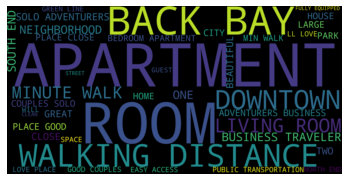

In [44]:
# Create stopword list:
stopwords = set(STOPWORDS)
#For now let's only remove the
stopwords.update(["the"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black", 
                      width= 2000, height = 1000, 
                      max_words=40).generate(summary_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()